## 🧠💡 Intelligent Systems  for Smart Health 👨‍⚕👩‍⚕️

# Data Exploration & Image Pre-Processing

In the next few sessions we will work with **image-based data** which is a very common data type in medicine (for instance: X-Ray, MRI, Microscopy, skin images, ...)

In a first part, we will work with chest x-ray images taken from the public [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315). In this notebook, you'll start to explore this dataset and familiarize yourself with some of the techniques to handle such data using Python.

The first step before jumping into writing code for any machine learning project is to explore your data. For this we will again use [pandas](https://pandas.pydata.org/docs/#). 

With the next two code cells, you'll import `pandas` and a package called `numpy` for numerical manipulation, then use `pandas` to read a csv file into a dataframe and print out the first few rows of data.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sb
#sb.set()

## 1. Exploration

Read the data from `csv` files.

In [2]:
# Read csv file containing training datadata
train_df = pd.read_csv("data/ChestX_small/train-small.csv")

# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image. 

### 1.1 Data Types and Null Values Check

Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### 1.2 Unique IDs Check

"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [8]:
#train_df.PatientId.value_counts()
#len(train_df.PatiendID.unique())
train_df.PatientId.nunique()

928

As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### 1.3 Data Labels

Run the next two code cells to create a list of the names of each patient condition or disease. 

In [11]:
columns = train_df.columns
classes = [c for c in columns if c not in ["Image","PatientId"]]

In [18]:
train_df[classes].sum().sort_values() # check for bias

Hernia                  2
Pneumonia              10
Emphysema              13
Fibrosis               14
Edema                  16
Cardiomegaly           20
Pleural_Thickening     21
Consolidation          33
Pneumothorax           38
Mass                   45
Nodule                 54
Atelectasis           106
Effusion              128
Infiltration          175
dtype: int64

In [20]:
train_df[classes].sum(axis="columns").value_counts() #check welche Personene keinen Befund haben und welche mehrere auf einmal haben

0    562
1    270
2    108
3     52
4      7
5      1
dtype: int64

Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### 1.4 Data Visualization

Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe. 

Run the cell below to visualize a random selection of images from the dataset.

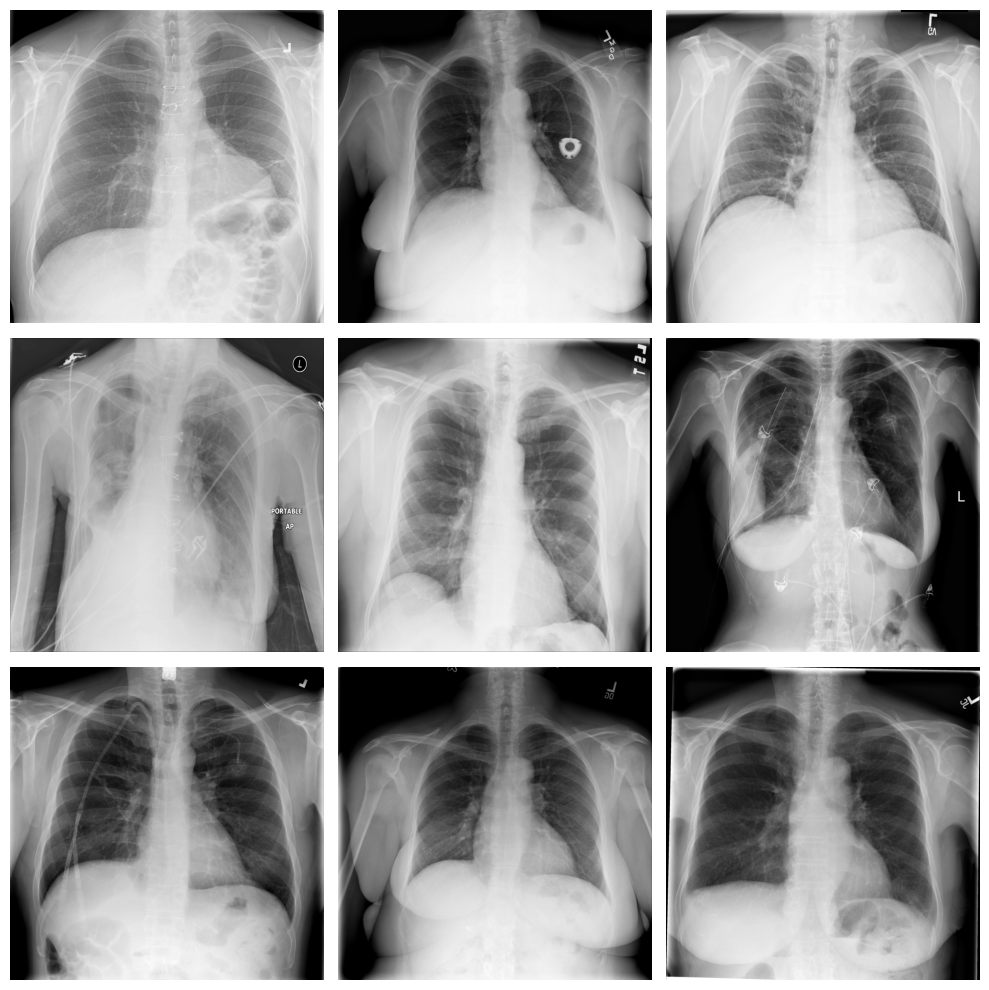

In [23]:
# Pick 9 random images
np.random.seed(0)
random_images = np.random.choice(train_df.Image, 9)
path_images = "data/ChestX_small/"

# Adjust the size of your images
plt.figure(figsize=(10,10))

# Iterate and plot random images
for i, filename in enumerate(random_images):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(path_images, filename))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

### 1.5 Investigating a Single Image

Run the cell below to look at the first image in the dataset and print out some details of the image contents.

In [28]:
filename = train_df.Image[1]
raw_image = plt.imread(os.path.join(path_images, filename))
raw_image.shape, raw_image.min(), raw_image.max()

((1024, 1024), 0.0, 1.0)

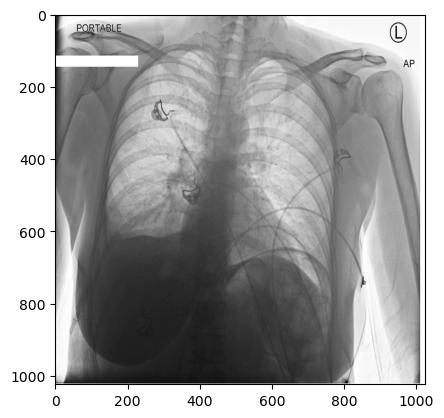

In [36]:
plt.imshow(raw_image, cmap="gray_r")

### 1.6 Investigating Pixel Value Distribution

Run the cell below to plot up the distribution of pixel values in the image shown above. 

C:\Users\Phili\AppData\Local\Temp\ipykernel_10824\2265250380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(raw_image.ravel())


<Axes: ylabel='Density'>

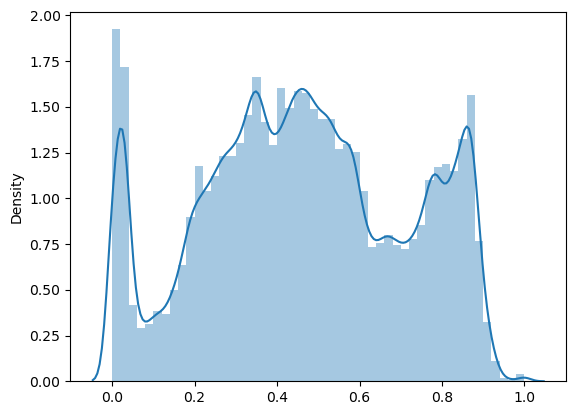

In [40]:
sb.distplot(raw_image.ravel())

## 2. Image Preprocessing in Keras

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras [ImageDataGenerator](https://keras.io/preprocessing/image/) function to perform data preprocessing and data augmentation.

Run the next two cells to import this function and create an image generator for preprocessing.

### 2.1 Standardization

The `image_generator` you created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [ ]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory="./ChestX_small/",
    x_col="Image", # features

    # Let's say we build a model for mass detection
    y_col= ['Mass'], # labels
    class_mode="raw", # 'Mass' column should be in train_df
    batch_size= 1, # images per batch
    shuffle=False, # shuffle the rows or not
    target_size=(320,320) # width and height of output image
)

In [ ]:
generated_image[0].max()

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image. 

In [ ]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')